Интернет-магазину «Стримчик», продающему по всему миру компьютерные игры, нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Из открытых источников доступны исторические данные* о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Располагая данными до 2016 года, необходимо спланировать кампанию на грядущий 2017 год.
  
  *В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats as st

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


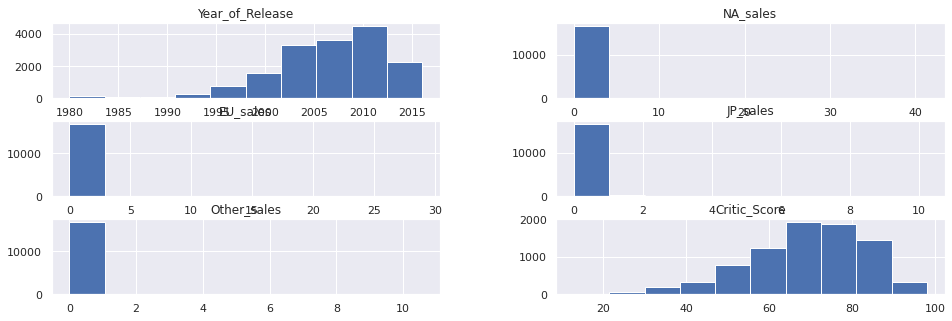

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(10));
display(data.info());
display(data.describe());
sb.set(rc={"figure.figsize":( 16 , 5 )}) # Задали размер графиков
data.hist();

С помощью гистограмм и статистик увидели наличие выбросов. На графике распределения для выпуска игр по годам выделяется значение, соответствующее 1980 году. Тем не менее, избавляться от него на текущем этапе не станем, но учтем при определении актуального периода для прогнозирования.  

Существенная разница между средним и медианным значениями для продаж позволяют сделать вывод о наличии выбросов. Учтем это при анализе.

### Подготовка данных

#### Изменение названия столбцов

In [3]:
data.columns = data.columns.str.lower()

#### Преобразование данных в нужные типы.

In [4]:
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')
data['critic_score'] = np.floor(pd.to_numeric(data['critic_score'], errors='coerce')).astype('Int64')
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Дата выхода продукта представлена только годом. Это позволяет нам привести данные к типу `Int64`. Оценки критиков принимают целочисленные значения, значит, тип данных также преобразовать в `Int64`.

В ряде данных `user_score` присутствуют значения `tbd`. Аббревиатура означает, что данные будут уточнены (to be determined = будет определено). Для дальнейшей корректной работы с рядом данных, преобразовали эти значения в `nan`, а затем тип данных всего ряда в `float64`.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


#### Обработка пропусков

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [7]:
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Видим две строчки, в которы пропущены все данные, кром продажи и года выпуска. Удалим их.

In [8]:
data = data.loc[~data['genre'].isna()]

In [9]:
len(data.loc[data['year_of_release'].isna()])/len(data['year_of_release'])

0.016095255190570215

Доля пропусков в год реализации - 1,6%. В условиях реальной задачи мы могли бы запросить уточнение информации, так как, имея название продукта, найти год его выпуска достаточно просто.
Тем не менее будем исходить из предположения, что завершить анализ необходимо в условиях строго ограниченного времени, поэтому исключим данные с пропусками из датасета.

In [10]:
data = data.loc[~data['year_of_release'].isna()]

Обработать пропуски в рядах `critic_score` и `user_score` не удастся. Заполнение любым расчетным значением приведет к искажению данных описательной статистики и, соответственно, к неверным выводам. В то же время, удалить пропущенные строки из датасета - некорректно, так как их доля достаточно высока.

Пропуски категориальных признаков ряда `rating` заполним специальным значением, что позволит провести анализ строк с пропусками. 

In [11]:
data['rating'] = data['rating'].fillna('w/o rating')

#### Расчет суммарных продаж во всех регионах.

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Исследовательский анализ данных

#### Выпуск игр в разные годы.

In [13]:
data_release_by_years = data.pivot_table(index = ['year_of_release'], values = 'name',  aggfunc = 'count').reset_index()
# Выведем на экран 5 первых и последних строк получившегося датафрейма.
display(data_release_by_years.head(5)) 
data_release_by_years.tail(5)

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


,year_of_release,name
32,2012,653
33,2013,544
34,2014,581
35,2015,606
36,2016,502


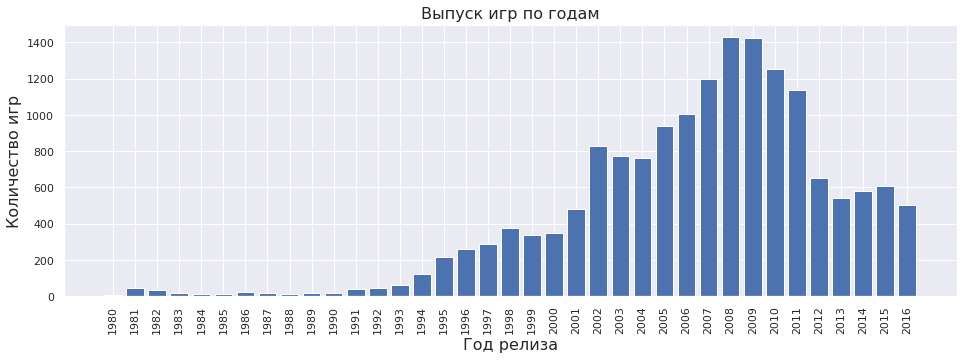

In [14]:
def hist_graph(data, pos_val, val_val):
    """Функция для построения гистограмм"""
    value = data[pos_val]
    position = data[val_val]
    fig, ax = plt.subplots()
    ax.bar(position, value)
    ax.set_xticks(position)
    ax.set_xticklabels(position, rotation = 90);
    
def graph_dis(xlab, ylab, titles):
    """Функция для добавления подписей графикам"""
    plt.xlabel(xlab, size= 16 , weight= 100);
    plt.ylabel(ylab, size= 16, weight= 100);
    plt.title(titles, size= 16, weight= 100);
    

hist_graph(data_release_by_years,
           'name',
           'year_of_release',
           )

graph_dis('Год релиза',
          'Количество игр',
          'Выпуск игр по годам')

Количество выпускаемых игр росло до 2008 года, после чего наметилась тенденция на снижение количества новых игр. Это может быть связано с увеличением необходимого количества ресурсов для производства конечного продукта - игры требуют большей проработки, в результате чего частота их выпуска снижается. 

#### Изменение продаж по платформам

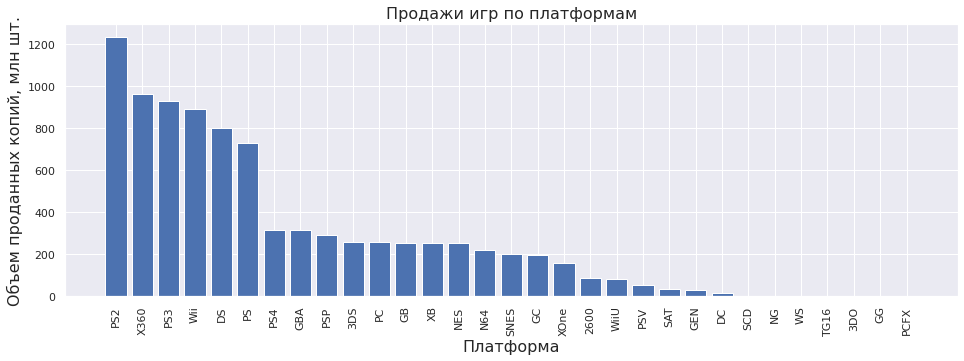

In [15]:
hist_graph(data.pivot_table(index = ['platform'], 
                            values = 'total_sales',  
                            aggfunc = 'sum').reset_index().sort_values('total_sales', ascending = False),
           'total_sales',
           'platform')

graph_dis('Платформа',
           'Объем проданных копий, млн шт.',
           'Продажи игр по платформам')


Наибольший объем продаж на момент исследования приходится на 6 платформ, при этом разница с ближайшим "*преследователем*" существенна.  

In [16]:
data_test = data.loc[(data['platform'] == 'PS2') | 
                                   (data['platform'] == 'X360') |
                                   (data['platform'] == 'PS3') |
                                   (data['platform'] == 'Wii') |
                                   (data['platform'] == 'DS') |
                                   (data['platform'] == 'PS')].groupby(['year_of_release', 'platform']).agg(total_sales=('total_sales', 'sum')).reset_index()

list = data_test['platform'].unique().tolist() # Создали список уникальных названий платформ

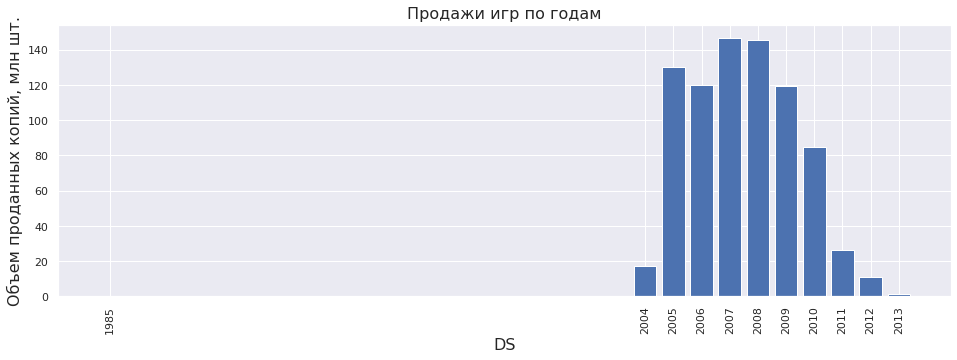

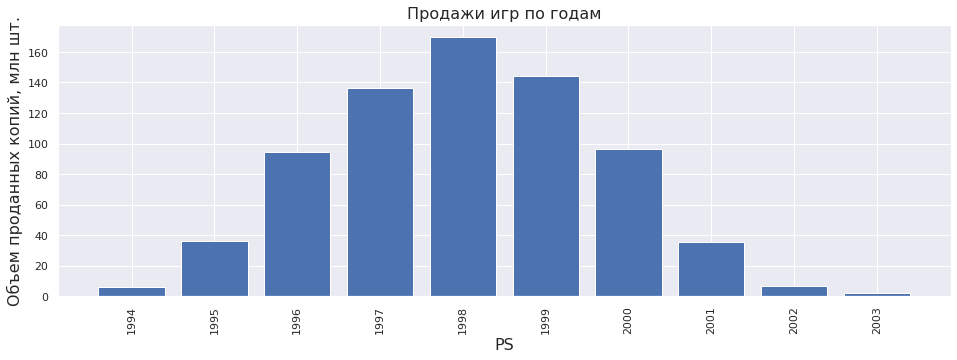

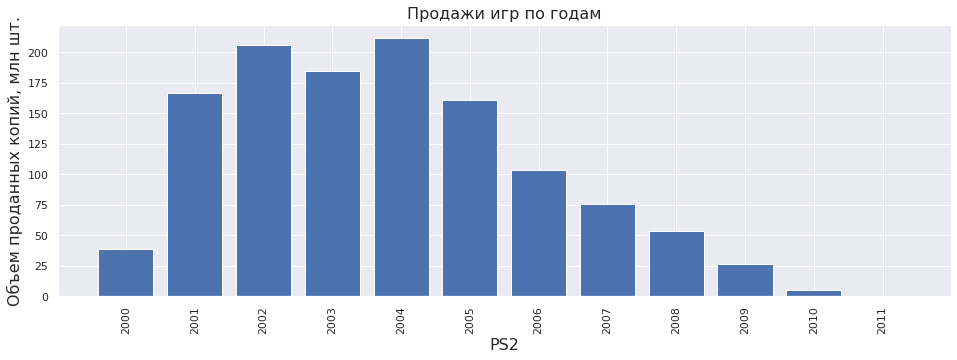

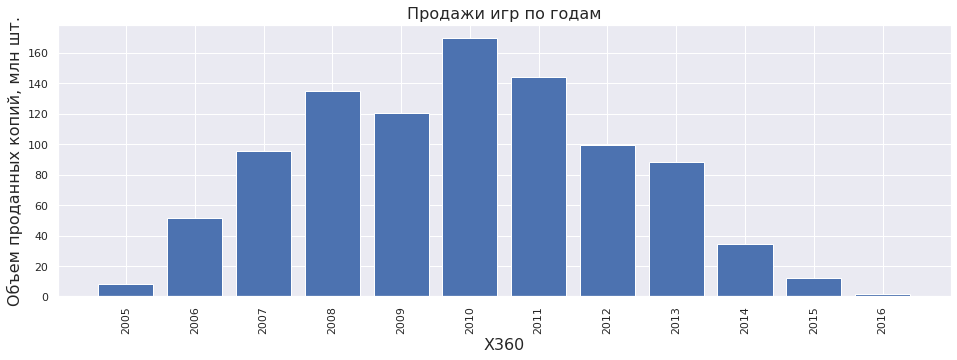

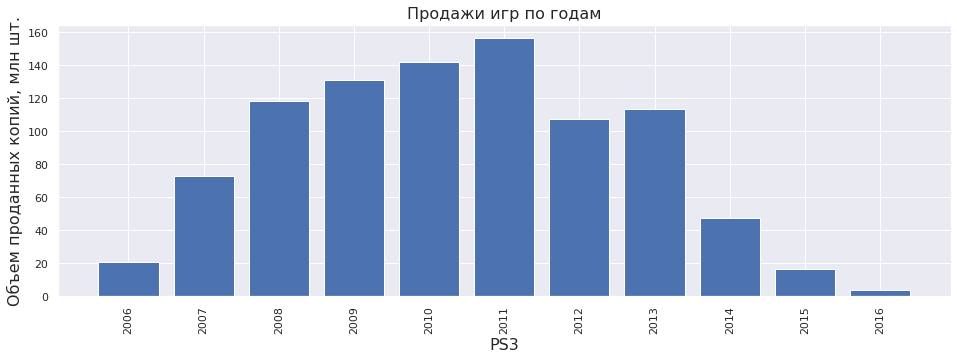

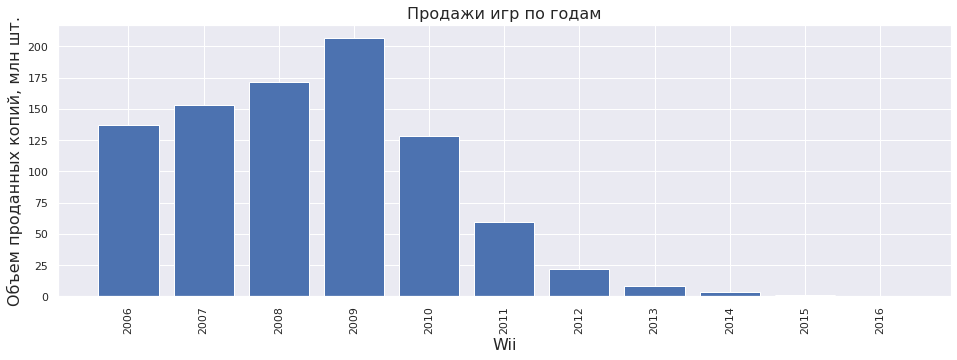

In [17]:
for i in range(len(list)):    
    hist_graph(data_test.loc[data_test['platform'] == list[i]],
               'total_sales',
               'year_of_release')
    graph_dis(f'{list[i]}',
               'Объем проданных копий, млн шт.',
               'Продажи игр по годам')

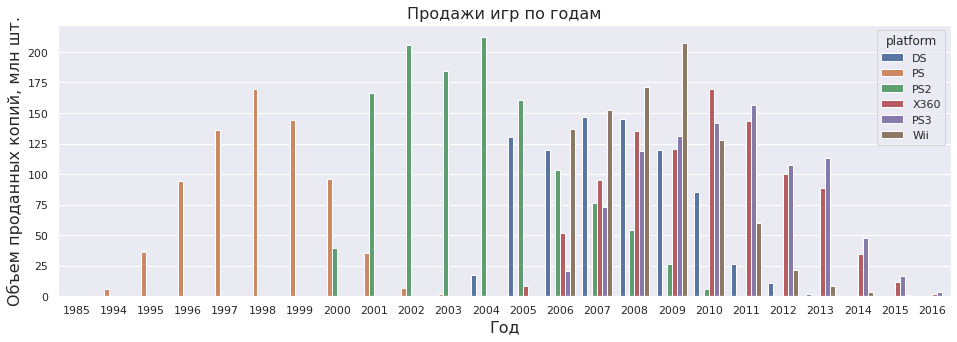

In [18]:
def sb_barplot(x_axis, y_axis, hue_def, data_def):
    ax = sb.barplot(x=x_axis,
                   y=y_axis,
                   hue=hue_def,
                   data=data_def)

sb_barplot('year_of_release',
           'total_sales',
           'platform',
           data_test)

graph_dis('Год',
          'Объем проданных копий, млн шт.',
          'Продажи игр по годам')

#### Выбор актуального периода.

Берем данные за 5 лет, так как этого периода, исходия из наблюдаемых данных, достаточно для прохождения пика популярности платформы и, соответственно, пика продаж.

In [19]:
data_new = data.loc[data['year_of_release'] > 2011]
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,w/o rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,w/o rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,w/o rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,w/o rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,w/o rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,w/o rating,0.01


#### Объем продаж по платформам.


In [20]:
data_fc_total_sales = data_new.pivot_table(index = ['platform'], 
                                          values = 'total_sales',  
                                          aggfunc = 'sum').sort_values('total_sales', ascending = False).reset_index()

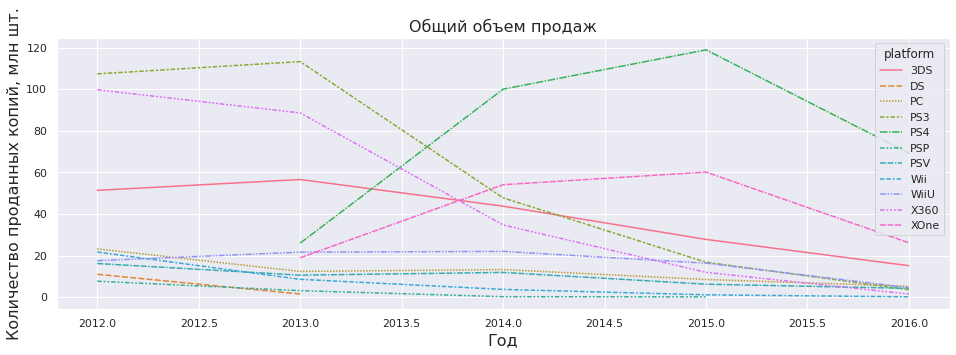

In [21]:
data_analyst = data_new.pivot_table(index = ['platform'], 
                            columns = 'year_of_release',
                            values = 'total_sales',  
                            aggfunc = 'sum').T

sb.lineplot(data=data_analyst);
graph_dis('Год',
         'Количество проданных копий, млн шт.',
         'Общий объем продаж')

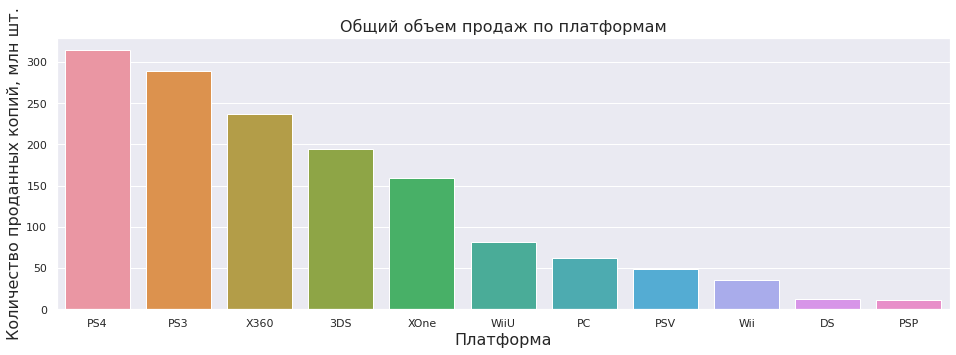

In [22]:
sb.barplot(x='platform', y='total_sales', data = data_fc_total_sales);
graph_dis('Платформа',
         'Количество проданных копий, млн шт.',
         'Общий объем продаж по платформам')

В анализируемом периоде большую часть копий игр продавали для платформ PS3, X360 и PS4.

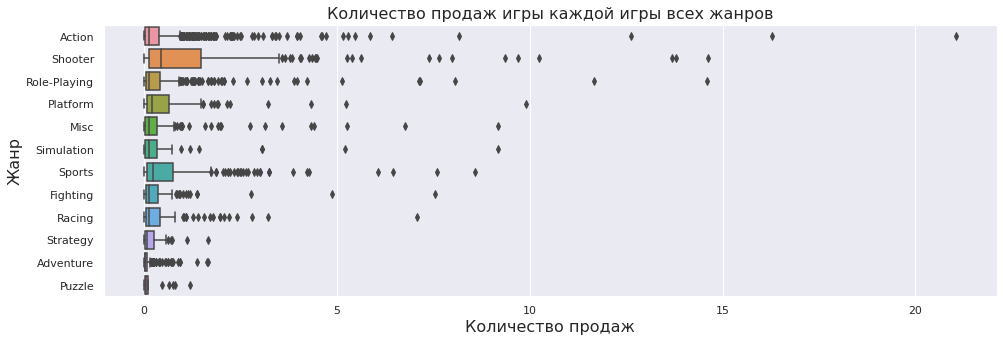

In [23]:
sb.boxplot(data=data_new, x='total_sales', y='genre');
graph_dis('Количество продаж',
         'Жанр',
         'Количество продаж игры каждой игры всех жанров')

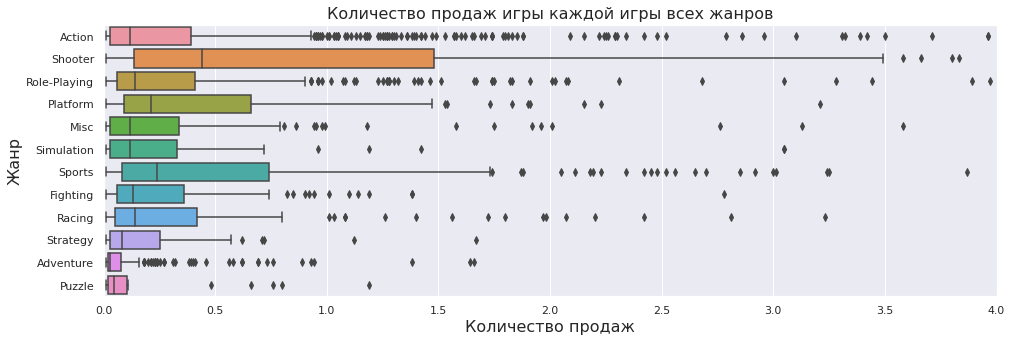

In [24]:
sb.boxplot(data=data_new, x='total_sales', y='genre');
graph_dis('Количество продаж',
         'Жанр',
         'Количество продаж игры каждой игры всех жанров')
plt.xlim(0, 4);

В каждом исследуемом жанре есть игры, количество проданных копий которых существенно выше, чем в целом у игр жанра. Это может свидетельствовать об успехе как жанра в целом, так и о популярности какой-либо франшизы/серии игр в частности (именно в случае единичных существенных, например в жанрах `Action`, `Shooter` и `Role-Playing`, выбросов). 

Диаграммы размаха в общем виде позволяют сделать вывод о том, какие значения считать нормальным (попадающие в размах «усов»), а какие следует отнести к выбросам. Чем "шире" построенный нам график, тем сильнее разброс визуализируемых значений.

#### Зависимость продаж от отзывов пользователей и критиков.


Наиболее популярным (по количеству продаж) являются PS3, PS4 и X360. Для анализа выберем PS3. Динамика продаж копий для PS4 позволяет сделать вывод, что объем реализации будет нарастать в ближайшие годы. В то же время снижение продаж копий в последние годы для платформ PS3 и Х360 свидетельствуют о том, что их пик популярности  пройден.

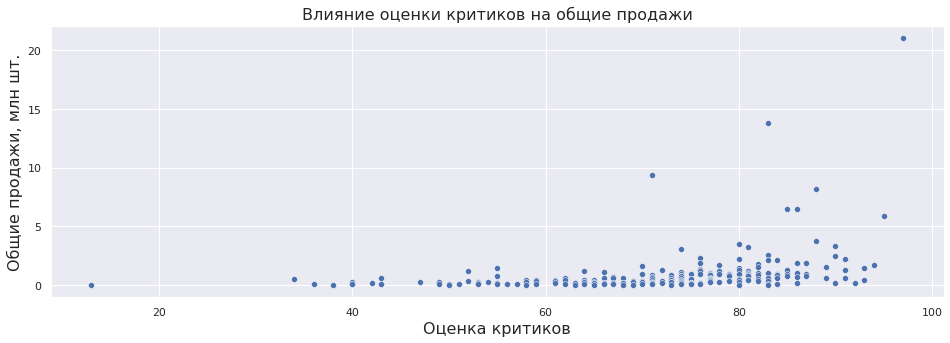

In [25]:
data_critic = data_new.loc[~data_new['critic_score'].isna()]
data_user = data_new.loc[~data_new['user_score'].isna()]
sb.scatterplot(x = data_critic.loc[(data_critic['platform'] == 'PS3')]['critic_score'], 
               y = data_critic.loc[(data_critic['platform'] == 'PS3')]['total_sales']);
graph_dis('Оценка критиков',
         'Общие продажи, млн шт.',
         'Влияние оценки критиков на общие продажи')

In [26]:
print('Коэффициент корреляции между оценкой критиков и общими продажами равен {:.2%}'.format(
    data_critic.loc[(data_critic['platform'] == 'PS3')]['total_sales'].corr(
    data_critic.loc[(data_critic['platform'] == 'PS3')]['critic_score'].astype('float64'))))

Коэффициент корреляции между оценкой критиков и общими продажами равен 33.15%


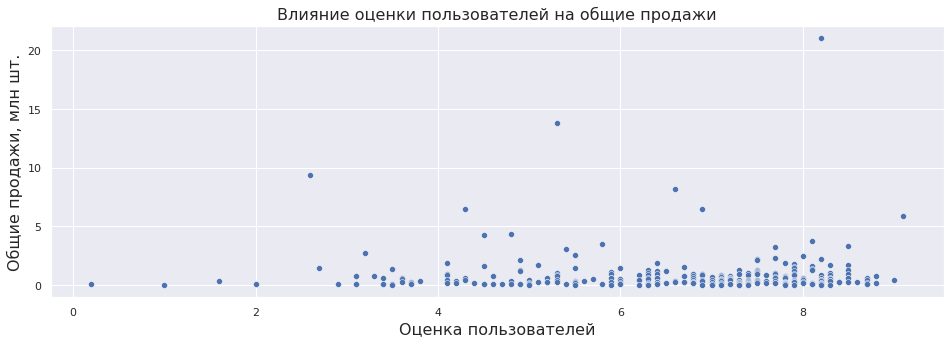

In [27]:
sb.scatterplot(x = data_user.loc[(data_user['platform'] == 'PS3')]['user_score'], 
               y = data_user.loc[(data_user['platform'] == 'PS3')]['total_sales']);
graph_dis('Оценка пользователей',
         'Общие продажи, млн шт.',
         'Влияние оценки пользователей на общие продажи')

In [28]:
print('Коэффициент корреляции между оценкой пользователей и общими продажами равен {:.2%}'.format(
    data_user.loc[(data_user['platform'] == 'PS3')]['total_sales'].corr(
    data_user.loc[(data_user['platform'] == 'PS3')]['user_score'])))

Коэффициент корреляции между оценкой пользователей и общими продажами равен -0.51%


Как видим, отзывы критиков оказываэт прямое слабое прямое влияние на продажи, в то время как отзывы пользователей практически не значимы. 

#### Выводы с продажами игр на других платформах.


In [29]:
list_an = data_new['platform'].unique().tolist()
corr_critic = []
corr_user = []
for i in range(len(list_an)):
    corr_crit = data_critic.loc[(data_critic['platform'] == list_an[i])]['total_sales'].corr(
                data_critic.loc[(data_critic['platform'] == list_an[i])]['critic_score'].astype('float64'))
    corr_critic.append(corr_crit)
    corr_us = data_user.loc[(data_user['platform'] == list_an[i])]['total_sales'].corr(
                data_user.loc[(data_user['platform'] == list_an[i])]['user_score'])
    corr_user.append(corr_us)

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [30]:
dict = {'platform':list_an, 'corr_critic': corr_critic, 'corr_user': corr_user}
data_corr = pd.DataFrame(dict)
data_corr.sort_values('corr_critic', ascending = False)

,platform,corr_critic,corr_user
5,XOne,0.416998,-0.068925
2,PS4,0.406568,-0.031957
1,X360,0.360573,0.006164
6,WiiU,0.348380,0.400219
0,PS3,0.331497,-0.005144
3,3DS,0.320803,0.197583
8,PC,0.237243,-0.121867
9,PSV,0.094488,-0.004339
7,Wii,-0.424341,0.296197
4,DS,NaN,0.882709


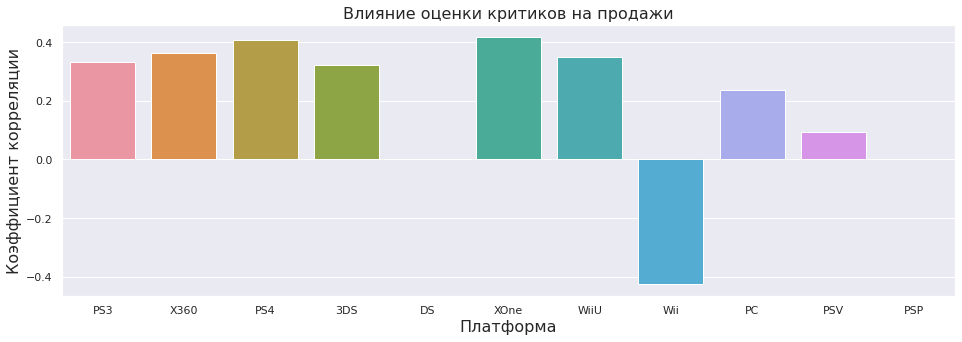

In [31]:
sb.barplot(x='platform', y='corr_critic', data = data_corr);
graph_dis('Платформа',
         'Коэффициент корреляции',
         'Влияние оценки критиков на продажи')

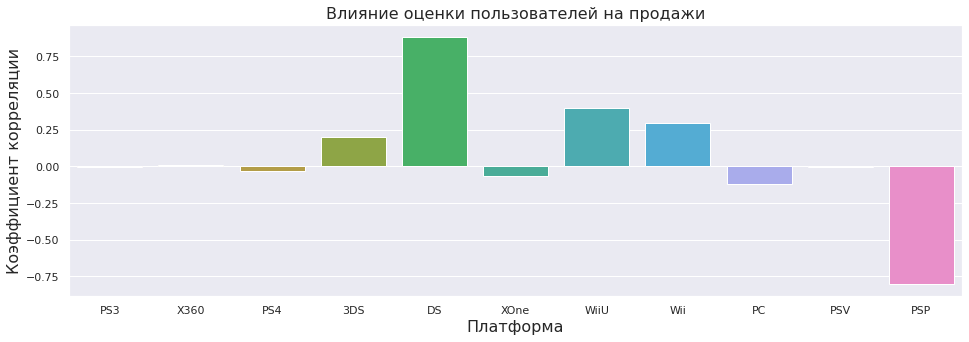

In [32]:
sb.barplot(x='platform', y='corr_user', data = data_corr);
graph_dis('Платформа',
         'Коэффициент корреляции',
         'Влияние оценки пользователей на продажи')

Взаимосвязь между оценкой критиков и общим количеством проданных копий слабая и прямая практически для всех исследуемых платформ за рассматриваемый период. Выделяются из списка PSV и PC, коэффициент корреляции у которых говорит о наличии прямой очень слабой связи, а также Wii, обладающий обратной слабой связью. При этом коэффициент корреляции для DS и PSP не расчитан, так как в данных за рассматриваемый период присутствуют пропуски значений.  

Взаимосвязь между оценкой пользователей и общим количеством проданных копий более вариативна. Влияние оценок пользователей на продажи копий игр для DS сильное и прямое. Для WiiU она прямая и слабая. При этом коэффициент корреляции, рассчитанный для PSP говорит о сильной обратной связи. Для остальных приставок связь является очень слабой, при этом для 5 из них - обратная. 

#### Общее распределение игр по жанрам.

,genre,games_quantity,median_sales
8,Shooter,235,0.440
10,Sports,268,0.240
4,Platform,85,0.210
7,Role-Playing,370,0.140
6,Racing,115,0.140
2,Fighting,109,0.130
0,Action,1031,0.120
3,Misc,192,0.120
9,Simulation,80,0.120
11,Strategy,71,0.080


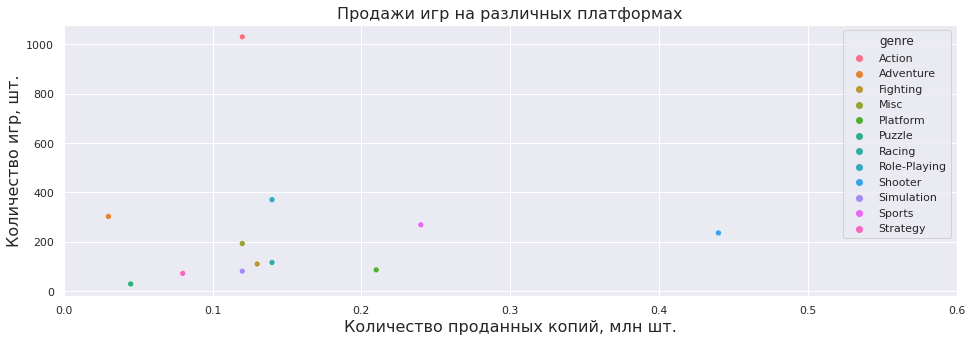

In [33]:
data_genre = data_new.pivot_table(index = ['genre'], values = 'total_sales',  aggfunc = ('count', 'median')).reset_index()
data_genre.columns = ['genre', 'games_quantity', 'median_sales'] # Переименовали столбцы
display(data_genre.sort_values('median_sales', ascending = False))
sb.scatterplot(x = data_genre['median_sales'], 
               y = data_genre['games_quantity'],
              hue = data_genre['genre']);
plt.xlim(0, 0.6);
graph_dis('Количество проданных копий, млн шт.',
          'Количество игр, шт.',
          'Продажи игр на различных платформах')

Наибольшее количество выпущенных игр относятся к жанру `Action`, но медианные продажи достаточно низки. Это может свидетельствовать о высокой популярности отдельных игр жанра, но и насыщенности рынка такими играми. При этом максимальное медианное значение продаж наблюдается у игр жанра `Shooter`, что позволяет сделать вывод о стабильности в продажах такого продукта. Аутсайдером можно назвать жанр `Puzzle`. В целом, анализируя график продаж игр на различных платформах, можем сделать вывод о том, что игры жанра `Shooter`, `Sports`, `Platform`, `Role-Playing` и `Racing` являются наиболее популярными. Низкие продажи характерны для жанров `Adventure`, `Puzzle` и `Strategy`.

### Портрет пользователя каждого региона

#### Для пользователя каждого региона (NA, EU, JP):

In [34]:
# Создадим датафреймы для анализа по каждому региону
data_eu = data_new.drop(['na_sales', 'jp_sales', 'other_sales', 'total_sales'], axis = 1)
data_na = data_new.drop(['eu_sales', 'jp_sales', 'other_sales', 'total_sales'], axis = 1)
data_jp = data_new.drop(['eu_sales', 'na_sales', 'other_sales', 'total_sales'], axis = 1)

#### Самые популярные платформы (топ-5).

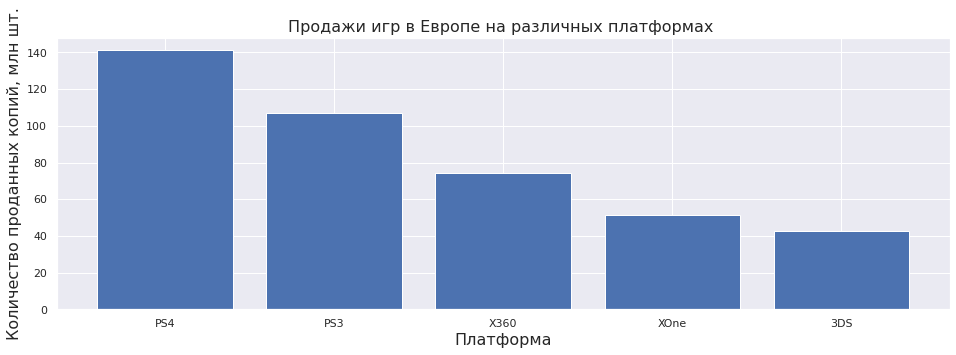

In [35]:
def hist_graph_rotation(data, pos_val, val_val):
    """Функция для построения гистограмм"""
    value = data[pos_val]
    position = data[val_val]
    fig, ax = plt.subplots()
    ax.bar(position, value)
    ax.set_xticks(position)
    ax.set_xticklabels(position);
    
hist_graph_rotation(data_eu.pivot_table(index = ['platform'], 
                                        values = 'eu_sales',  
                                        aggfunc = 'sum'
                                        ).reset_index().sort_values('eu_sales', ascending = False).head(5),
                    'eu_sales',
                    'platform',
                    )
graph_dis('Платформа',
         'Количество проданных копий, млн шт.',
         'Продажи игр в Европе на различных платформах ')

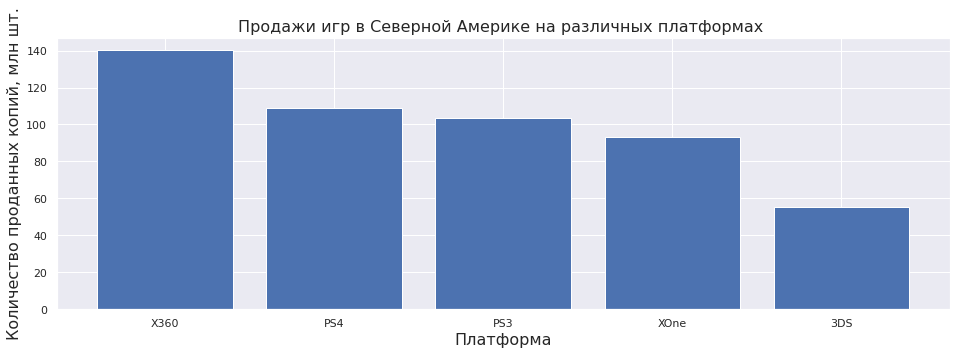

In [36]:
hist_graph_rotation(data_na.pivot_table(index = ['platform'], 
                                        values = 'na_sales',  
                                        aggfunc = 'sum'
                                        ).reset_index().sort_values('na_sales', ascending = False).head(5),
                    'na_sales',
                    'platform',
                    )
graph_dis('Платформа',
         'Количество проданных копий, млн шт.',
         'Продажи игр в Северной Америке на различных платформах ')

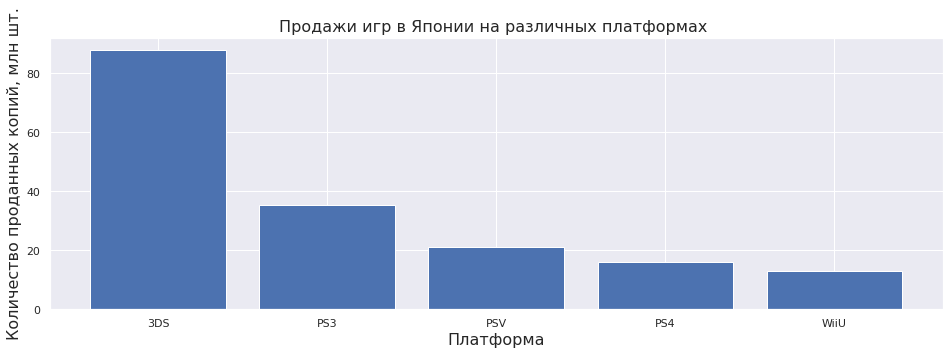

In [37]:
hist_graph_rotation(data_jp.pivot_table(index = ['platform'], 
                                        values = 'jp_sales',  
                                        aggfunc = 'sum'
                                        ).reset_index().sort_values('jp_sales', ascending = False).head(5),
                    'jp_sales',
                    'platform',
                    )
graph_dis('Платформа',
         'Количество проданных копий, млн шт.',
         'Продажи игр в Японии на различных платформах ')

In [38]:
data_region_sales = data_new.drop(['other_sales', 'total_sales'], axis = 1)
data_region_sales = data_region_sales.pivot_table(index = ['platform'], 
                               values = ['na_sales', 'eu_sales', 'jp_sales'],  
                               aggfunc = 'sum'
                              ).reset_index()
# Добавим столбцы с долей в общшем объеме продаж
data_region_sales['eu_share'] = data_region_sales['eu_sales'] / data_region_sales['eu_sales'].sum() 
data_region_sales['na_share'] = data_region_sales['na_sales'] / data_region_sales['na_sales'].sum()
data_region_sales['jp_share'] = data_region_sales['jp_sales'] / data_region_sales['jp_sales'].sum()

pd.options.display.float_format = '{:,.4f}'.format # Задали формат отражения чисел с плавающей запятой

In [39]:
data_region_sales_share = data_region_sales.drop(['na_sales', 'jp_sales', 'eu_sales'], axis = 1)
list_platform = data_region_sales_share['platform'].tolist()

In [40]:
data_0 = data_region_sales_share.set_index('platform').T.reset_index()
data_0.loc[data_0['index'] == 'eu_share', 'index'] = 'Европа'
data_0.loc[data_0['index'] == 'na_share', 'index'] = 'Северная Америка'
data_0.loc[data_0['index'] == 'jp_share', 'index'] = 'Япония'

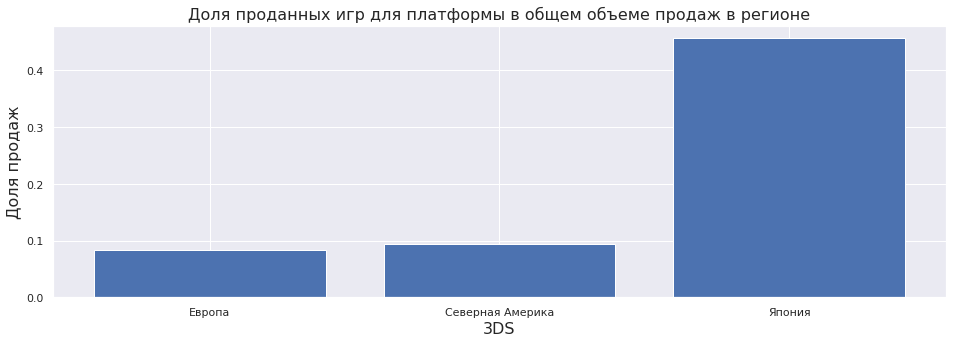

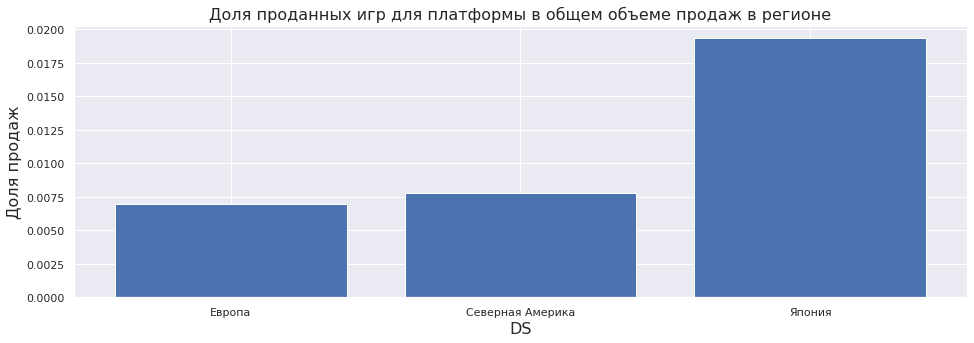

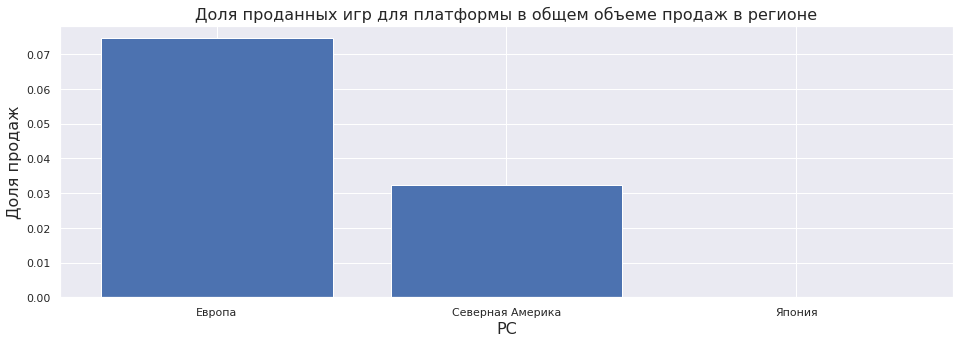

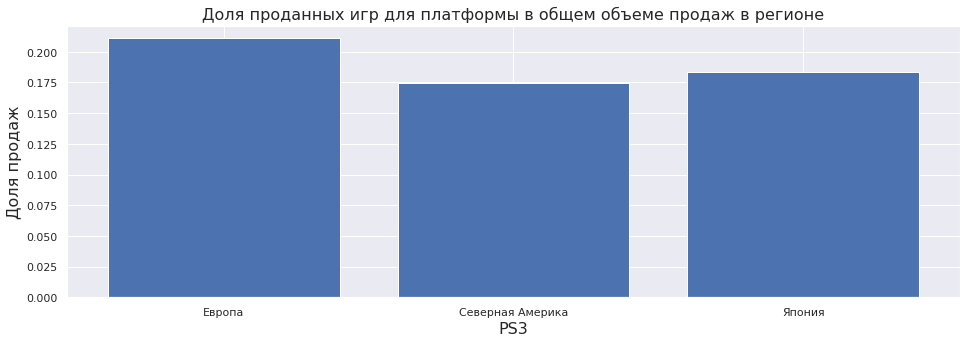

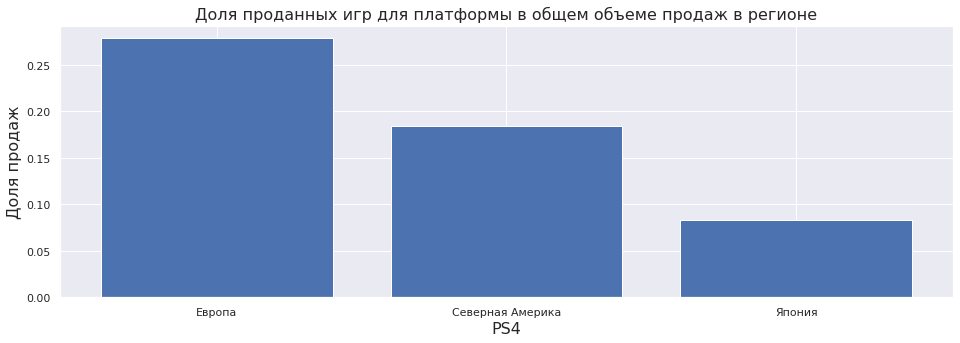

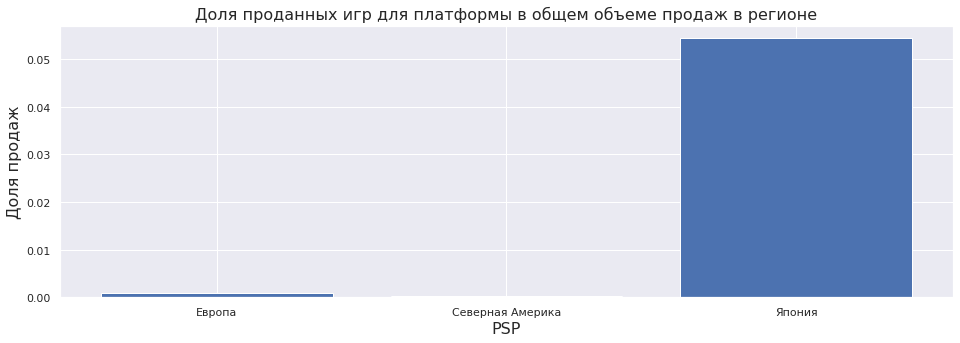

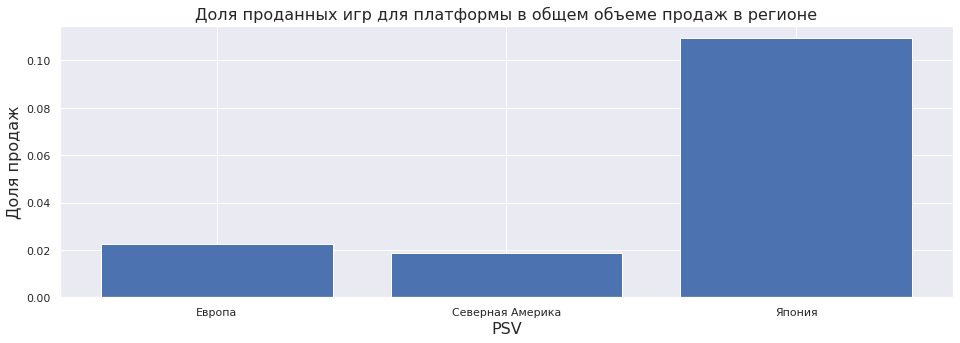

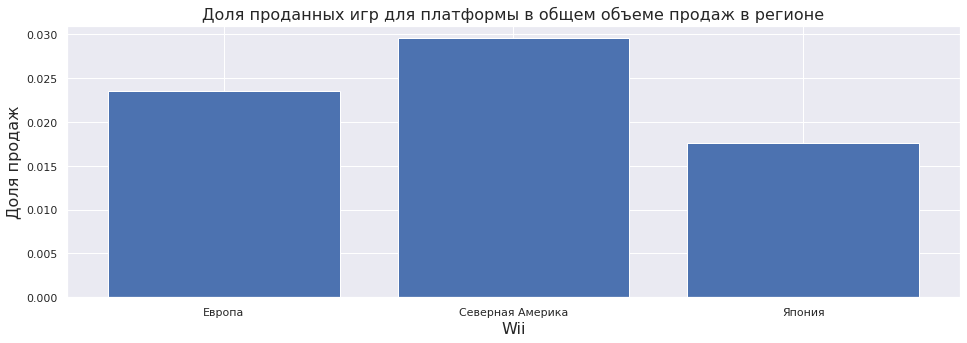

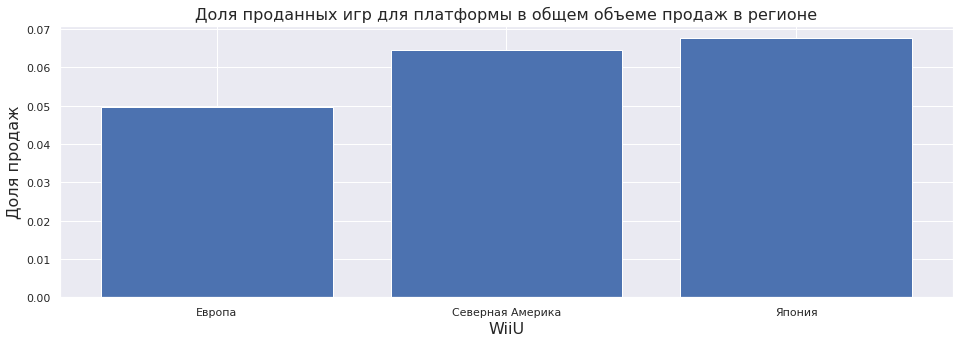

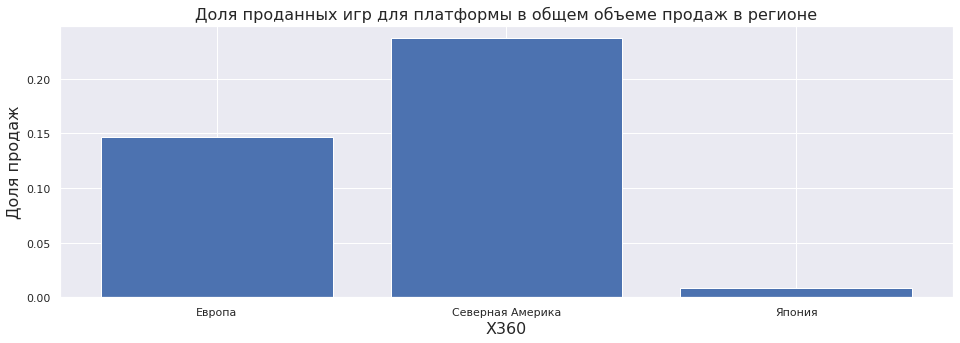

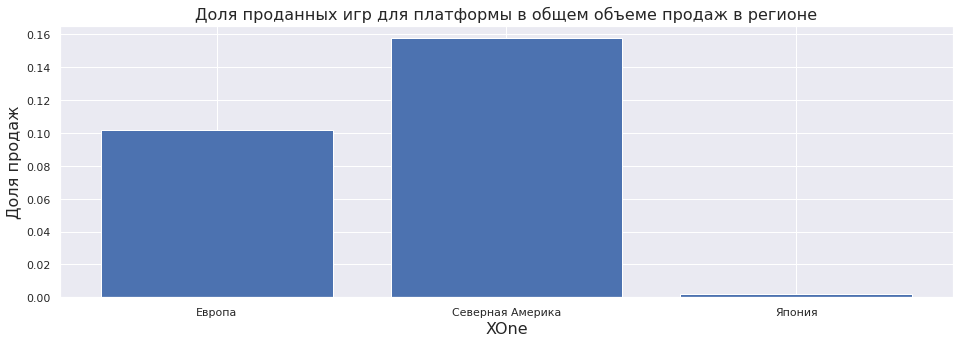

In [41]:
for i in range(len(list_platform)):    
    hist_graph_rotation(data_0, list_platform[i], 'index')
    graph_dis(f'{list_platform[i]}',
               'Доля продаж',
               'Доля проданных игр для платформы в общем объеме продаж в регионе')

Европейские потребители отдают предпочтение приставкам PlayStation последних поколений (1 и 2 места по количеству проданных копий). Продажи игр для XBox занимают 3 и 4 места, а замыкает пятерку лидеров Nintendo. В Северной Америке в исследуемом периоде по количеству проданных копий игр лидирует X360, а замыкает пятерку лидеров также Nintendo 3DS.  
В Японии все иначе - наибольшей популярностью пользуются портативные консоли - количество проданных копий для 3DS более чем в 2 раза превосходит ближайшего конкурента - PS3.

#### Самые популярные жанры (топ-5).

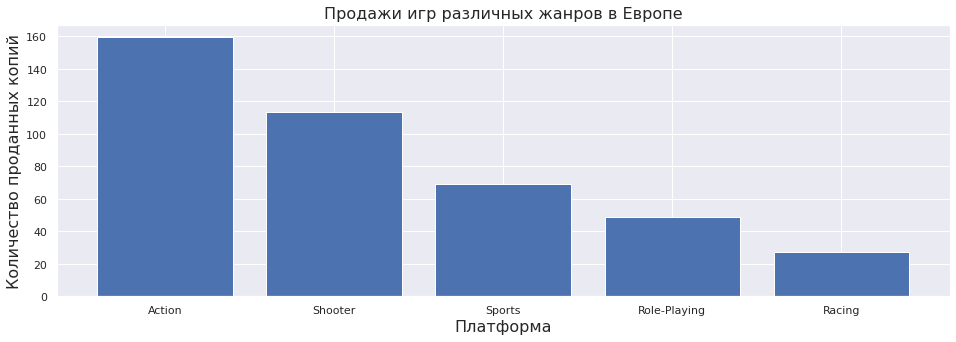

In [42]:
hist_graph_rotation(data_eu.pivot_table(index = ['genre'], 
                                        values = 'eu_sales',  
                                        aggfunc = 'sum'
                                        ).reset_index().sort_values('eu_sales', ascending = False).head(5),
                    'eu_sales',
                    'genre',
                    )
graph_dis('Платформа',
         'Количество проданных копий',
         'Продажи игр различных жанров в Европе')

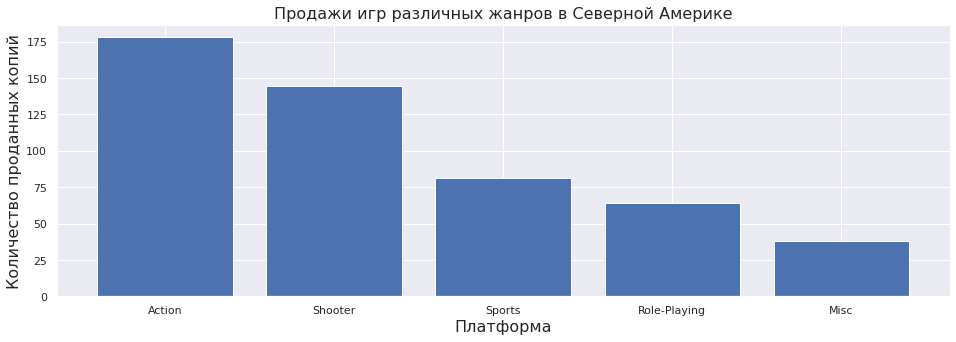

In [43]:
hist_graph_rotation(data_na.pivot_table(index = ['genre'], 
                                        values = 'na_sales',  
                                        aggfunc = 'sum'
                                        ).reset_index().sort_values('na_sales', ascending = False).head(5),
                    'na_sales',
                    'genre',
                    )
graph_dis('Платформа',
         'Количество проданных копий',
         'Продажи игр различных жанров в Северной Америке')

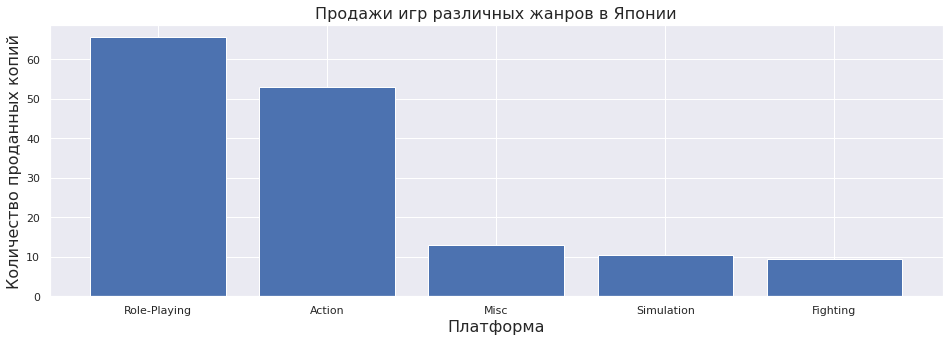

In [44]:
hist_graph_rotation(data_jp.pivot_table(index = ['genre'], 
                                        values = 'jp_sales',  
                                        aggfunc = 'sum'
                                        ).reset_index().sort_values('jp_sales', ascending = False).head(5),
                    'jp_sales',
                    'genre',
                    )
graph_dis('Платформа',
         'Количество проданных копий',
         'Продажи игр различных жанров в Японии')

В Европе и Северной Америке пятерка лидеров среди жанров практически не отличается - первые 4 позиции идентичны (`Action`, `Shooter`, `Sports`, `Role-Playing`), а вот пятая позиция в регионах разная - `Racing` и `Misc` соответственно.  
В Японии наибольшей популярностью пользуются игры жанра `Role-Playing` и `Action`.

Разница в предпочтениях пользователей в разрезе жанров может быть объяснена выбором платформы для игры.

#### Влияние рейтинга ESRB на продажи в отдельном регионе.

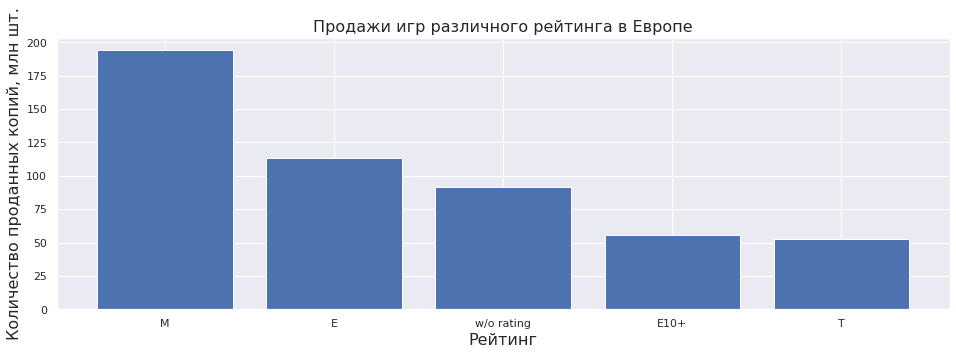

In [45]:
hist_graph_rotation(data_eu.pivot_table(index = ['rating'], 
                                        values = 'eu_sales',  
                                        aggfunc = 'sum'
                                        ).reset_index().sort_values('eu_sales', ascending = False),
                    'eu_sales',
                    'rating',
                    )
graph_dis('Рейтинг',
         'Количество проданных копий, млн шт.',
         'Продажи игр различного рейтинга в Европе')

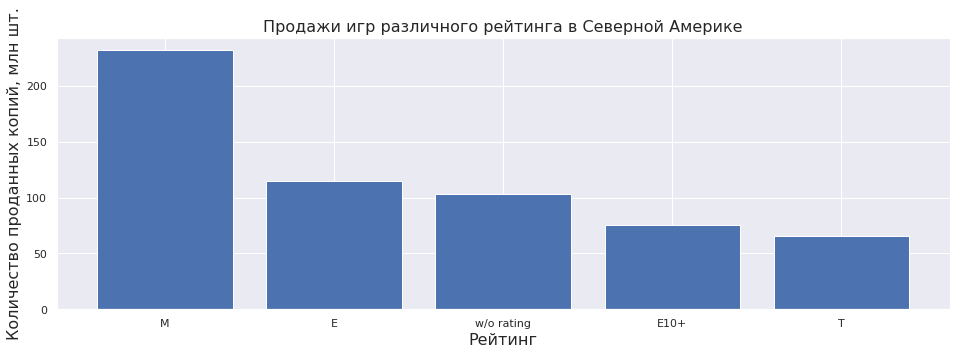

In [46]:
hist_graph_rotation(data_na.pivot_table(index = ['rating'], 
                                        values = 'na_sales',  
                                        aggfunc = 'sum'
                                        ).reset_index().sort_values('na_sales', ascending = False).head(5),
                    'na_sales',
                    'rating',
                    )
graph_dis('Рейтинг',
         'Количество проданных копий, млн шт.',
         'Продажи игр различного рейтинга в Северной Америке')

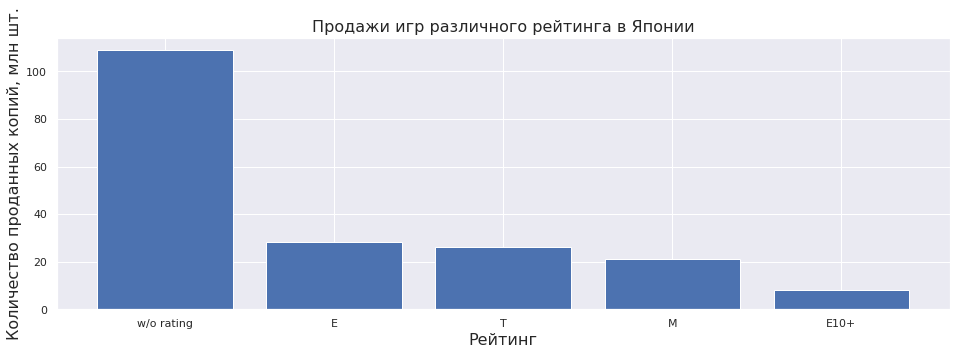

In [47]:
hist_graph_rotation(data_jp.pivot_table(index = ['rating'], 
                                        values = 'jp_sales',  
                                        aggfunc = 'sum'
                                        ).reset_index().sort_values('jp_sales', ascending = False).head(5),
                    'jp_sales',
                    'rating',
                    )
graph_dis('Рейтинг',
         'Количество проданных копий, млн шт.',
         'Продажи игр различного рейтинга в Японии')

В Европе и Северной Америке распределение проданных копий по рейтингу совпадает - наибольшей популярностью пользуются игры, не подходящие для лиц младше 17 лет (`M` - `mature`). В Японии же больше продают игры, рейтинг которых не был определен. Это может быть связано с тем, что возрастными рейтингами для консольных игр в Японии занимается CERO, в то время как нам доступны данные ERSB.

### Проверка гипотез


#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


```
Нулевая гипотеза H0: Средний рейтинг пользователей (user_score) "Xbox One" = средний рейтинг пользователей (user_score) пользователей "PC"`
Альтернативная гипотеза H1: Средний рейтинг пользователей (user_score) "Xbox One" ≠ средний рейтинг пользователей (user_score) пользователей "PC"`
alpha = 0.05
```

In [48]:
data_user_score = data_new.loc[~data_new['user_score'].isna()]

In [49]:
results = st.ttest_ind(data_user_score.loc[data_new['platform'] == 'XOne']['user_score'],
                       data_user_score.loc[data_new['platform'] == 'PC']['user_score'],
                       equal_var = False)

alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


```
Нулевая гипотеза H0: Средний рейтинг пользователей (user_score) жанра "Action" = средний рейтинг пользователей (user_score) жанра "Sports"`
Альтернативная гипотеза H1: Средний рейтинг пользователей (user_score) жанра "Action" ≠ средний рейтинг пользователей (user_score) жанра "Sports"`
alpha = 0.05
```

In [50]:
results = st.ttest_ind(data_user_score.loc[data_new['genre'] == 'Action']['user_score'],
                       data_user_score.loc[data_new['genre'] == 'Sports']['user_score'],
                       equal_var = False)

alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.24307776572644e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза сформирована, исходя из задания. Альтернативную формируем на основании нулевой - она является противоположной для нулевой. При этом нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения.  
В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). При этом если выборки разного размера или есть сомнения, что дисперсии у совокупностей одинаковые, необходимо указать параметр False для equal_var, и тест посчитает дисперсии выборок по отдельности.

### Общий вывод

Взаимосвязь между оценкой критиков и общим количеством проданных копий слабая и прямая практически для всех исследуемых платформ за рассматриваемый период. Поэтому при прогнозировании популярности новых продуктов от использования ретроспективных данных по рейтингу аналогичных продуктов среди критиков следует отказаться. 

Взаимосвязь между оценкой пользователей и общим количеством проданных копий более вариативна. Влияние оценок пользователей на продажи копий игр для DS сильное и прямое. При этом коэффициент корреляции, рассчитанный для PSP говорит о сильной обратной связи. Анализ конкретных отзывов пользователей может помочь определить наиболее популярный продукт. 

Наибольшее количество выпущенных игр относятся к жанру `Action`, но медианные продажи достаточно низки. Это может свидетельствовать о высокой популярности отдельных игр жанра, но и насыщенности рынка такими играми. При этом максимальное медианное значение продаж наблюдается у игр жанра `Shooter`, что позволяет сделать вывод о стабильности в продажах такого продукта. Аутсайдером можно назвать жанр `Puzzle`. В целом, анализируя график продаж игр на различных платформах, можем сделать вывод о том, что игры жанра `Shooter`, `Sports`, `Platform`, `Role-Playing` и `Racing` являются наиболее популярными. Низкие продажи характерны для жанров `Adventure`, `Puzzle` и `Strategy`.

Таким образом, следует обратить внимание на наиболее популярные жанры. Стоит оценить целесообразность изменения рекламной кампании относительно этих жанров. В то же время существует вероятность, что увеличение рекламы для жанров-аутсайдеров не даст ожидаемых результатов. Особое внимание следует уделить играм жанра `Action`. Далеко не все игры этого жанра продаются достаточно хорошо. Необходим дополнительный анализ, который позволит выявить наиболее популярные франшизы. 

Европейские потребители отдают предпочтение приставкам PlayStation последних поколений. Продажи игр для XBox занимают 3 и 4 места, а замыкает пятерку лидеров Nintendo. В Северной Америке в исследуемом периоде по количеству проданных копий игр лидирует X360, а замыкает пятерку лидеров также Nintendo 3DS.  
В Японии все иначе - наибольшей популярностью пользуются портативные консоли.

В Европе и Северной Америке пятерка лидеров среди жанров практически не отличается - первые 4 позиции идентичны (`Action`, `Shooter`, `Sports`, `Role-Playing`). В Японии наибольшей популярностью пользуются игры жанра `Role-Playing` и `Action`.

Разница в предпочтениях пользователей в разрезе жанров может быть объяснена выбором платформы для игры.

В Европе и Северной Америке распределение проданных копий по рейтингу совпадает - наибольшей популярностью пользуются игры, не подходящие для лиц младше 17 лет (`M` - `mature`). В Японии же больше продают игры, рейтинг которых не был определен. Это может быть связано с тем, что возрастными рейтингами для консольных игр в Японии занимается CERO, в то время как нам доступны данные ERSB. Для более детального анализа следует рассмотреть оценки разных рейтинговых моделей: американская ESRB, европейская PEGI, японская CERO.